In [742]:
import pandas as pd
import os
import json
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Step 1: read all json files and combine them into one dataframe

In [743]:
#read data
path = ((os.getcwd()).split('\\'))
path.pop()
path  = '\\'.join(path) + '\\Data governance\\data'
data_list = os.listdir(path) 
dfs = []
for file in  data_list:
    f = open(path + '\\' + file)
    data1 = json.load(f)
    df = pd.read_json(data1, orient ='index')
    dfs.append(df.T)
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.head()

,track_id,track_name,track_url,track_popularity,album_id,album_name,countries,album_url,album_image,track_preview,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,3eJMSq78dDaFb7VvhNFnq6,ADMV,https://open.spotify.com/track/3eJMSq78dDaFb7V...,68,6wUJI0qgwrwiYJhFr53Gaa,ADMV,China,https://open.spotify.com/album/6wUJI0qgwrwiYJh...,https://i.scdn.co/image/ab67616d0000b273adab96...,https://open.spotify.com/embed/track/3eJMSq78d...,...,-4.959,1,0.0556,0.817,0.0,0.126,0.708,163.781,193700,4
1,0Snbzbd74RLfL0i4nn1vU5,Favorito,https://open.spotify.com/track/0Snbzbd74RLfL0i...,65,5wb9Mx2yfXZzKYPzHp4fae,Favorito,China,https://open.spotify.com/album/5wb9Mx2yfXZzKYP...,https://i.scdn.co/image/ab67616d0000b273e8caae...,https://open.spotify.com/embed/track/0Snbzbd74...,...,-2.982,1,0.0598,0.229,0.0,0.232,0.823,178.032,211613,4
2,7k4t7uLgtOxPwTpFmtJNTY,Tusa,https://open.spotify.com/track/7k4t7uLgtOxPwTp...,76,7mKevNHhVnZER3BLgI8O4F,Tusa,China,https://open.spotify.com/album/7mKevNHhVnZER3B...,https://i.scdn.co/image/ab67616d0000b273ddd315...,https://open.spotify.com/embed/track/7k4t7uLgt...,...,-3.28,1,0.298,0.295,0.000134,0.0574,0.574,101.085,200960,4
3,4uziEsK1yiqdauKVDPsmVG,Rojo,https://open.spotify.com/track/4uziEsK1yiqdauK...,64,54lqxBRUg66EYNyqKSKU5C,Rojo,China,https://open.spotify.com/album/54lqxBRUg66EYNy...,https://i.scdn.co/image/ab67616d0000b273ead7b9...,https://open.spotify.com/embed/track/4uziEsK1y...,...,-4.04,1,0.113,0.15,0.000115,0.0842,0.444,172.27,150853,4
4,4Pu0a2TuHOYtI4CCE3HEXI,Sigues Con El - Remix,https://open.spotify.com/track/4Pu0a2TuHOYtI4C...,64,0vPG06qvqmD1XL1uAFysKM,Sigues Con El (Remix),China,https://open.spotify.com/album/0vPG06qvqmD1XL1...,https://i.scdn.co/image/ab67616d0000b273d38e4b...,https://open.spotify.com/embed/track/4Pu0a2TuH...,...,-2.97,0,0.298,0.102,0.000003,0.0872,0.736,175.994,189567,4


### Step2 Remove Null and duplicate value

In [744]:
#drop duplicate songs
before = len(combined_df)
combined_df = combined_df.drop_duplicates(subset = 'track_name')
after = len(combined_df)
data  = [before, after]
col  = ['Before_Drop', 'After_Drop']
fig = px.bar(x= data,y = col, title = 'drop duplicate', color = col)
fig.show()
print('before drop: ',  before, '\nafter drop: ', after)

before drop:  3563 
after drop:  949


In [745]:
combined_df.nunique()

track_id             949
track_name           949
track_url            949
track_popularity      97
album_id             790
album_name           782
countries             19
album_url            790
album_image          790
track_preview        949
artist_id            519
artist_name          519
artist_url           519
artist_image         514
artist_genre         113
artist_followers     537
artist_popularity     89
record_date            4
Country               19
danceability         465
energy               526
key                   12
loudness             907
mode                   2
speechiness          593
acousticness         736
instrumentalness     553
liveness             480
valence              560
tempo                930
duration_ms          939
time_signature         4
dtype: int64

In [746]:
# select feature and genre
combined_df = combined_df[['artist_genre',  'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'track_popularity']]
combined_df.columns = ['genre',  'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature','track_popularity']

In [747]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 3252
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   genre             949 non-null    object
 1   danceability      949 non-null    object
 2   energy            949 non-null    object
 3   key               949 non-null    object
 4   loudness          949 non-null    object
 5   mode              949 non-null    object
 6   speechiness       949 non-null    object
 7   acousticness      949 non-null    object
 8   instrumentalness  949 non-null    object
 9   liveness          949 non-null    object
 10  valence           949 non-null    object
 11  tempo             949 non-null    object
 12  duration_ms       949 non-null    object
 13  time_signature    949 non-null    object
 14  track_popularity  949 non-null    object
dtypes: object(15)
memory usage: 118.6+ KB


In [748]:
#change data type:
combined_df['danceability'] = combined_df['danceability'].astype(float)
combined_df['energy'] = combined_df['energy'].astype(float)
combined_df['key'] = combined_df['key'].astype(str)
combined_df['loudness'] = combined_df['loudness'].astype(float)
combined_df['mode'] = combined_df['mode'].astype(str)
combined_df['speechiness'] = combined_df['speechiness'].astype(float)
combined_df['acousticness'] = combined_df['acousticness'].astype(float)
combined_df['instrumentalness'] = combined_df['instrumentalness'].astype(float)
combined_df['liveness'] = combined_df['liveness'].astype(float)
combined_df['valence'] = combined_df['valence'].astype(float)
combined_df['tempo'] = combined_df['tempo'].astype(float)
combined_df['duration_ms'] = combined_df['duration_ms'].astype(int)
combined_df['genre'] = combined_df['genre'].astype(str)
combined_df['time_signature'] = combined_df['time_signature'].astype(str)
combined_df['track_popularity'] = combined_df['track_popularity'].astype(int)
print(combined_df.dtypes)

genre                object
danceability        float64
energy              float64
key                  object
loudness            float64
mode                 object
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int32
time_signature       object
track_popularity      int32
dtype: object


Remove missing Genre

In [749]:
import plotly.graph_objects as go
#filter the Null genre
combined_df = combined_df[combined_df["genre"] != 'Null']
# visualise genre
genre_counts = combined_df["genre"].value_counts().head(15)
genre_counts_df = pd.DataFrame({
    'genre': genre_counts.index,
    'count': genre_counts.values
})
fig = go.Figure(data=[go.Bar(
    x=genre_counts_df['genre'], y=genre_counts_df['count'],
    text=genre_counts_df['count'], textposition='auto'
)])

fig.update_layout(title='Top 15 genre_counts', xaxis_title='Genre', yaxis_title='Count')

fig.show()

I used LabelEncoder to convert label to numeric value,  This will help me identify which features have a strong positive or negative correlation with the target variable. and also a good practice to check for multicollinearity, for now everything looks cool

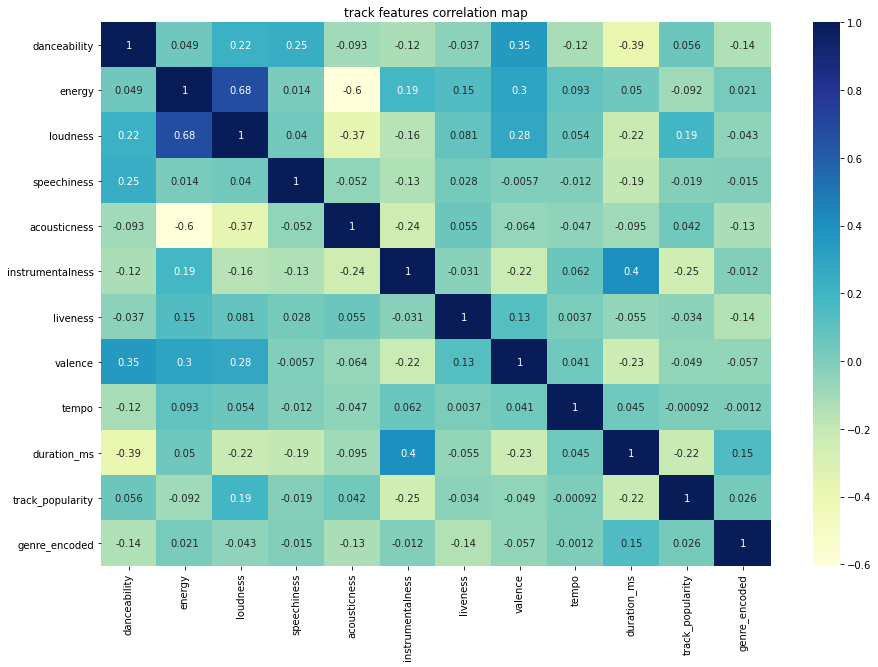

In [750]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
combined_df['genre_encoded'] = encoder.fit_transform(combined_df['genre'])

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(combined_df.corr(), annot=True, cmap='YlGnBu')
plt.title('track features correlation map')
plt.show()

Check for Multicollinearity

In [751]:
corr_matrix = combined_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop

[]

danceability: -0.51
energy: -0.43
key: -0.05
loudness: -1.06
mode: -0.23
speechiness: 2.05
acousticness: 0.67
instrumentalness: 2.96
liveness: 2.46
valence: 0.01
tempo: 0.38
duration_ms: 2.40
time_signature: -3.42
track_popularity: -0.58
genre_encoded: -0.80


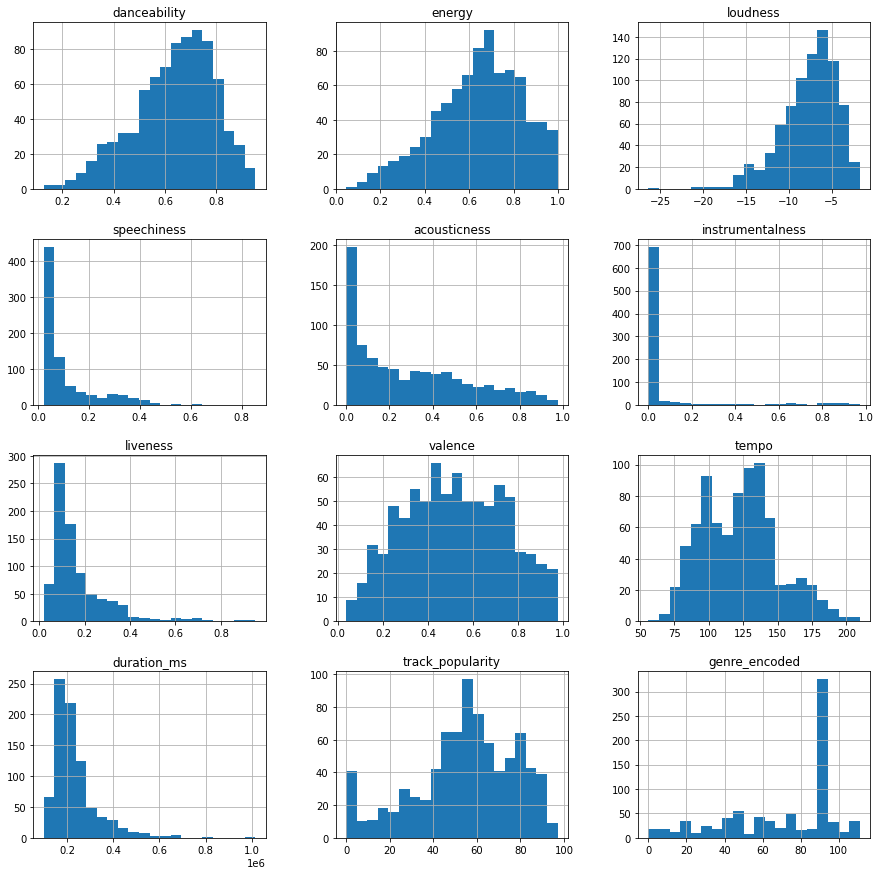

In [752]:
combined_df.hist(bins=20, figsize=(15,15))
skew_values = combined_df.skew()
for col_name, skew_val in skew_values.iteritems():
    print(f"{col_name}: {skew_val:.2f}")


plt.show()

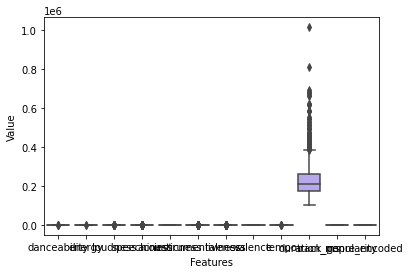

In [753]:
sns.boxplot(data=combined_df.drop(['genre'], axis=1))
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

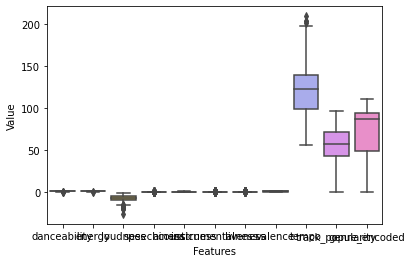

In [754]:
sns.boxplot(data=combined_df.drop(['genre','duration_ms'], axis=1))
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

there are two problems:

1. features are skewed. 


2. features are not on the same scale, eg. duration_ms is much larger than others

### Step3 Remove outliers

From last plot, we can see there are many outliers in duration_ms, but in next plot, we can see different genre has a different duration_ms distribution, so what I should do is remove outliers by each genre

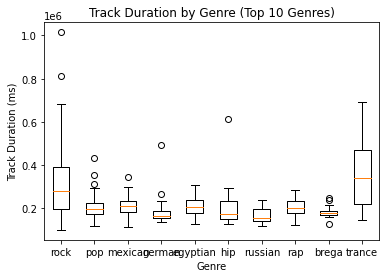

In [755]:
# Calculate the top 10 most common genres by value counts
top_genres = combined_df['genre'].value_counts().head(10).index

# Subset the DataFrame to include only the top 10 genres
top_genre_df = combined_df[combined_df['genre'].isin(top_genres)]

# Create a box plot of track duration by genre for only the top 10 genres
plt.boxplot([top_genre_df[top_genre_df['genre'] == genre]['duration_ms'] for genre in top_genres], labels=top_genres)
plt.xlabel('Genre')
plt.ylabel('Track Duration (ms)')
plt.title('Track Duration by Genre (Top 10 Genres)')

# Display the plot
plt.show()

In [756]:
# combined_df.reset_index(drop=True)
# feature = ['genre','key','time_signature','mode']
# col = combined_df.columns.tolist()
# unique_genres = combined_df['genre'].unique().tolist()
# for f in col:
#     if f not in col:
#         for genre in unique_genres:
#             plt.boxplot([top_genre_df[top_genre_df['genre'] == genre]['track_popularity'] for genre in top_genres], labels=top_genres)
#             plt.show()

In [757]:
# remove outliers
combined_df.reset_index(drop=True)
feature = ['genre','key','time_signature','mode']
col = combined_df.columns.tolist()
unique_genres = combined_df['genre'].unique().tolist()
outliers_row_numbers = []
for f in col:
    if f not in feature:
        for genre in unique_genres:
            df = combined_df[combined_df['genre'] == genre][[f,'genre']]
            Q1 = df[f].quantile(0.25)
            Q3 = df[f].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[f] < lower_bound) | (df[f] > upper_bound)]
            outliers_row_numbers.extend(outliers.index.tolist())
combined_df = combined_df.drop(index=outliers_row_numbers, axis=1)
combined_df = combined_df.reset_index(drop=True)
print('number of outliers removed:', len(outliers_row_numbers))

number of outliers removed: 410


### Transformation:

for 'key','time_signature'and 'mode'.

I will use time_signature as an example,  it is a convention in Western musical notation to specify how many of a particular note value are contained in each measure. So these features are categorical 

In [758]:
# apply one hot encoding:
from sklearn.preprocessing import OneHotEncoder
subset_df = combined_df[['key', 'time_signature', 'mode']]

onehotencoder = OneHotEncoder()
onehotencoder.fit(subset_df)
onehotencoded_array = onehotencoder.transform(subset_df).toarray()
onehotencoded_df = pd.DataFrame(onehotencoded_array, columns=onehotencoder.get_feature_names(['key', 'time_signature', 'mode']))
combined_df = pd.concat([combined_df, onehotencoded_df], axis=1)
combined_df = combined_df.drop(['key', 'time_signature', 'mode','genre_encoded'] , axis=1)
combined_df.head()

,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_6,key_7,key_8,key_9,time_signature_1,time_signature_3,time_signature_4,time_signature_5,mode_0,mode_1
0,pop,0.611,0.851,-2.982,0.0598,0.229,0.000000,0.2320,0.823,178.032,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,reggaeton,0.803,0.715,-3.280,0.2980,0.295,0.000134,0.0574,0.574,101.085,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,reggaeton,0.652,0.595,-4.040,0.1130,0.150,0.000115,0.0842,0.444,172.270,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,boy,0.803,0.642,-3.759,0.2170,0.153,0.000002,0.1400,0.856,170.037,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,latino,0.810,0.820,-3.497,0.0698,0.201,0.000000,0.1300,0.672,92.999,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [759]:
corr_matrix = combined_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop

['time_signature_4', 'mode_1']

In [760]:
#convert duration_ms to second
combined_df = combined_df.rename(columns={'duration_ms': 'duration_minutes'})
combined_df['duration_minutes'] = combined_df['duration_minutes'].div(60000)

In [761]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# set the number of runs
num_runs = 100

# initialize the best accuracy and best model for each algorithm
rf_best_acc = 0
rf_best_model = None
lr_best_acc = 0
lr_best_model = None

#shuffle my dataframe
combined_df = combined_df.drop(['time_signature_4', 'mode_1'], axis=1)
shuffled_df = combined_df.sample(frac=1, random_state=42)

# split the dataframe into X and y
X = shuffled_df.drop('genre', axis=1)
y = shuffled_df['genre']

# repeat the experiment multiple times
for i in range(num_runs):
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # train the RandomForestClassifier model on the training data
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    # make predictions on the test set and compute the accuracy
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    # check if this is the best RandomForestClassifier model so far
    if acc > rf_best_acc:
        rf_best_acc = acc
        rf_best_model = rf
    
    # train the LogisticRegression model on the training data
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    
    # make predictions on the test set and compute the accuracy
    y_pred = lr.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    # check if this is the best LogisticRegression model so far
    if acc > lr_best_acc:
        lr_best_acc = acc
        lr_best_model = lr
        
# print the best accuracy and the parameters of the best models for each algorithm
print('Best accuracy for RandomForestClassifier:', rf_best_acc)
print('Best accuracy for LogisticRegression:', lr_best_acc)

        

Best accuracy for RandomForestClassifier: 0.5288461538461539
Best accuracy for LogisticRegression: 0.3942307692307692


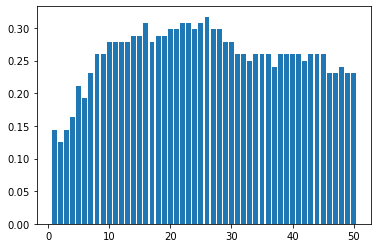

Maximum Accuracy for Knn: 0.3173076923076923
K: 26


In [620]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# create a KNN classifier object
accs = {}
for k in range(50):
    k = k+1
    knn = KNeighborsClassifier(n_neighbors=k)

    # fit the KNN classifier to the training data
    knn.fit(X_train, y_train)

    # make predictions on the testing data
    y_pred = knn.predict(X_test)

    # calculate the accuracy of the KNN classifier
    acc = accuracy_score(y_test, y_pred)
    accs[k] = acc
plt.bar(accs.keys(), accs.values())
plt.show()
max_value = max(accs.values())
max_key = max(accs, key=lambda k: accs[k])

# print the result
print("Maximum Accuracy for Knn:", max_value)
print("K:", max_key)



